In [ ]:
"""
Purpose: To decompose the multi-somas for splitting
using the new decomposition method



"""


In [22]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-18 23:52:38,032 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-18 23:52:38,033 - settings - Setting database.user to celiib
INFO - 2021-01-18 23:52:38,033 - settings - Setting database.password to newceliipass
INFO - 2021-01-18 23:52:38,036 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-18 23:52:38,037 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-18 23:52:38,049 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-18 23:52:38,357 - settings - Setting enable_python_native_blobs to True


In [2]:
#so that it will have the adapter defined
from datajoint_utils import *

In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-18 23:52:38,411 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-18 23:52:38,412 - settings - Setting database.user to celiib
INFO - 2021-01-18 23:52:38,413 - settings - Setting database.password to newceliipass
INFO - 2021-01-18 23:52:38,418 - settings - Setting enable_python_native_blobs to True


Sleeping 42 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-18 23:52:38,708 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie.Decomposition() & "n_not_processed_soma_containing_meshes>0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947406332,0,0.25,30.00,0,0,1,=BLOB=,328842,692896,1,0,0,0,1,8,62,23,2520231.488282837,1146796.6354879977,31168.443,237.218,223.03,503.298,488.293,1098,0.00043567426448914173,17.70967741935484,2317022.849,57,0.00047388397592793875,19.263,183791533062.76538,86425792.70920816,72926.44898583979,79322.27907984924,3224412860.75027,815.4194
864691134964428319,0,0.25,30.00,0,0,1,=BLOB=,3093674,6227657,1,1,1,0,1,7,213,83,7409730.60753753,2788984.880539503,22403.987,176.734,176.734,453.744,417.12,2472,0.00033361536753918745,11.605633802816902,4248816.828,111,0.0005818090306245606,22.27,384740275309.73663,68035394.7741305,51923.65224700079,90552.3327751555,3466128606.394024,2783.1186
864691134988375930,0,0.25,30.00,0,0,1,=BLOB=,344336,739139,1,0,0,0,1,6,86,29,3306316.152236083,1439665.6897838088,22129.383,238.975,220.866,386.828,368.472,1077,0.00032574017438459957,12.523255813953488,2878079.605,60,0.00037420785656135455,17.95,258648659125.7224,135965511.70496798,78228.65304359858,89868.48684670847,4310810985.428707,934.1051
864691134988385914,0,0.25,30.00,0,0,1,=BLOB=,627859,1334901,1,1,1,0,1,6,68,31,3147335.2794002458,1866084.1569509613,24023.74,348.295,313.082,746.176,689.072,1144,0.0003634820883201233,16.823529411764707,2163254.004,48,0.0005288329516019238,23.833,116544001152.46948,53571057.827490486,37029.420384687466,53874.39521062801,2428000024.009781,1304.0565
864691134988414842,0,0.25,30.00,0,0,1,=BLOB=,1725060,3463921,1,0,0,0,1,4,414,326,12729581.092137888,9550052.890712276,19859.141,65.603,65.603,274.52,255.42,1312,0.00010306702086295082,3.1690821256038646,3209286.606,67,0.0004088135966252183,19.582,125987023317.78299,52482485.13316727,9897.18533594132,39257.01839226228,1880403333.1012387,2907.5029
864691134988427130,0,0.25,30.00,0,0,1,=BLOB=,1355805,2710697,1,0,0,0,1,8,123,82,5071833.274200376,3203528.2642787546,29842.095,407.047,352.089,76

In [15]:
segment_id = 864691135526084699
search_key = dict(segment_id=segment_id)

In [6]:
(minnie.Decomposition() & search_key)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135530571250,0,0.25,30.00,0,0,1,=BLOB=,377003,769997,2,1,1,0,1,1,1,1,46094.52423446586,46094.52423446586,46094.524,149.553,149.553,149.553,149.553,3,6.508365255578092e-05,3.0,46094.524,1,6.508365288683749e-05,3.0,2865524376.601345,49502659.02001953,62166.264305614226,62166.26462183111,2865524376.601345,115.3793


In [16]:
minnie.NeuronGliaNuclei() & search_key

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia (external storage),n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei (external storage)
864691135526084699,0,0.25,30.00,2900725,=BLOB=,66589,=BLOB=


In [13]:
du.plot_decimated_mesh_with_somas(segment_id,
                                  plot_glia_nuclei=True,
                                 )

Segment_id = 864691135526084699
vertices = 2484785, faces= = 5013936
subtracting glia and nuclei
curr_colors = ['red', 'red', 'red', 'brown', 'black']
curr_soma_meshes = [<trimesh.Trimesh(vertices.shape=(25861, 3), faces.shape=(51199, 3))>, <trimesh.Trimesh(vertices.shape=(18119, 3), faces.shape=(41623, 3))>, <trimesh.Trimesh(vertices.shape=(6525, 3), faces.shape=(12586, 3))>]
other_meshes_to_plot = [<trimesh.Trimesh(vertices.shape=(1433626, 3), faces.shape=(2900725, 3))>, <trimesh.Trimesh(vertices.shape=(27453, 3), faces.shape=(66589, 3))>]


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Defining the Table

In [17]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [18]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 4371


In [19]:
decimation_version = 0
decimation_ratio = 0.25
# key_source = (minnie.Decimation().proj(decimation_version='version')  & 
#                   dict(decimation_version=decimation_version,decimation_ratio=decimation_ratio)  
#                   & minnie.MultiSomaProofread2() & (dj.U("segment_id") & (minnie.BaylorSegmentCentroid()).proj()))

key_source = ((minnie.Decimation).proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}" &  (minnie.BaylorSegmentCentroid() & "multiplicity>0"))
                                                                  
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
864691134219060901,0,0.25
864691134221889045,0,0.25
864691134242673681,0,0.25
864691134252908410,0,0.25
864691134316523453,0,0.25
864691134384033872,0,0.25
864691134391593458,0,0.25
864691134409056935,0,0.25
864691134428609977,0,0.25
864691134441691943,0,0.25


In [20]:
#schema.external['decomposition'].delete(delete_external_files=True)

# Debugging the Non Processed Mesh Stuff

In [21]:
import numpy as np
import time
decimation_version = 0
decimation_ratio = 0.25
process_version = 0

key = dict(segment_id = segment_id,
          decimation_version=decimation_version,
          decimation_ratio=decimation_ratio)

In [33]:
"""
Pseudocode for process:

1) Get the segment id from the key
2) Get the decimated mesh
3) Get the somas info
4) Run the preprocessing
5) Calculate all starter stats
6) Save the file in a certain location
7) Pass stats and file location to insert
"""
import preprocessing_vp2 as pre
pre = reload(pre)

whole_pass_time = time.time()
#1) Get the segment id from the key
segment_id = key["segment_id"]
description = str(key['decimation_version']) + "_25"
print(f"\n\n\n---- Working on Neuron {key['segment_id']} ----")
global_start = time.time()

#2) Get the decimated mesh
current_neuron_mesh = du.fetch_segment_id_mesh(segment_id)


#3) Get the somas info 
somas = du.get_soma_mesh_list(segment_id) 
soma_ver = du.get_soma_mesh_list_ver(segment_id)


print(f"somas = {somas}")

#3b) Get the glia and nuclei information 
glia_faces,nuclei_faces = du.get_segment_glia_nuclei_faces(segment_id,return_empty_list=True)


#4) Run the preprocessing


total_neuron_process_time = time.time()

print(f"\n--- Beginning preprocessing of {segment_id}---")
recovered_neuron = neuron.Neuron(
mesh = current_neuron_mesh,
somas = somas,
segment_id=segment_id,
description=description,
suppress_preprocessing_print=False,
suppress_output=False,
calculate_spines=True,
widths_to_calculate=["no_spine_median_mesh_center"],
glia_faces=glia_faces,
nuclei_faces = nuclei_faces,

        )

print(f"\n\n\n---- Total preprocessing time = {time.time() - total_neuron_process_time}")




---- Working on Neuron 864691135526084699 ----
somas = [[<trimesh.Trimesh(vertices.shape=(25861, 3), faces.shape=(51199, 3))>, <trimesh.Trimesh(vertices.shape=(18119, 3), faces.shape=(41623, 3))>, <trimesh.Trimesh(vertices.shape=(6525, 3), faces.shape=(12586, 3))>], array([1212.7993, 1212.7993, 1212.7993]), array([0.664, 0.607, 0.763])]

--- Beginning preprocessing of 864691135526084699---
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(25861, 3), faces.shape=(51199, 3))>, <trimesh.Trimesh(vertices.shape=(18119, 3), faces.shape=(41623, 3))>, <trimesh.Trimesh(vertices.shape=(6525, 3), faces.shape=(12586, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(25861, 3), faces.shape=(51199, 3))>, <trimesh.Trimesh(vertices.shape=(18119, 3), faces.shape=(41623, 3))>, <trimesh.Trimesh(vertices.shape=(6525

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:07<00:00,  7.92s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 11.905962705612183
connecting at the root
branches_touching_root = [91]
length of Graph = 24663
Working on path [8426. 8438. 8451. 8463. 8477. 8485.]
path_degrees = [3, 2, 2, 2, 2, 3]
Working on path [15973. 15983. 15994. 16010. 16022. 16032. 16044. 16045.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 91, len(kept_branches_idx) = 90
empty_indices % = 0.0
 conflict_indices % = 0.008688119819796475



AFTER face_lookup_resolved_test



Decomposing first pass: 31.931970834732056
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [32080, 2315, 417, 1217, 20937, 18782, 10698, 110229, 137, 22603, 24130]
mesh_large_connectivity: 0.4549844264984131
Finding MAP candidates connected components: 0.00018668174743652344
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.727910041809082
Grouping MP Sublimbs by Graph: 0.17407631874084473
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.019376516342163086
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.16535329818725586
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 53.22653579711914
Checking connected components after removing cycles
Total time for mesh KDTree = 1.253788948059082
sbv[0].reshape(-1,3) = [[1109658.   993709.5  720666.2]]
closest_sk_pt_coord BEFORE = [1108880.  992055.  719906.]
current_skeleton.shape = (4878, 2, 3)
node_for_stitch = 1769: [1108880.  992055.  719906.]
node_for_stitch AFTER = 1769: [1108880.  992055.  719906.]
possible_node_loc = [   0   36   45  134  135  225  267  317  372  407  433  534  537  590
  703  777  785  813  981 1076 1083 1096 1181 1232 1239 1315 1326 1353
 1466 1468 1469 1484 1536 1544 1546 1576 1592 1655 1720 1733 1769 1783
 1824 1843 1857 1871 1926 2094 2118 2137 2184 2242 2263 2303 2421 2430
 2432 2434 2572 2594 2740 2988 3007 3027 3135 3143 3161 3215 3389 3539
 3648 3704 3783 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4377, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 103.84716129302979
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_16535.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_16535_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_851891.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_16535.off
removed temporary output file: /notebooks/Auto_Proofreading/Decompositio


Total time for decomposition = 39.08066010475159
mesh_correspondence_first_pass: 39.08069133758545
Limb decomposed into 13 branches
divided_skeleton_graph_recovered = (4377, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4377, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (12, 13)
empty_indices % = 0.13986023481275628
 conflict_indices % = 0.021802101909098315



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 162.2931845188141
correspondence_1_to_1: 19.345611333847046
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.002975940704345703
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/poisson_631555.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabse


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04674172401428223
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.522886991500854
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.031058311462402344
filter_end_node_length = 4000
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_24273.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_24273_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_498329.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_24273.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimi


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (576, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 20.807527542114258
Working on limb correspondence for #1 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_207.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_207_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_491552.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_207.off
removed tem


Total time for decomposition = 3.3748722076416016
mesh_correspondence_first_pass: 3.374906301498413
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (576, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (576, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1499358492235544
 conflict_indices % = 0.013759235499712428



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 24.977413654327393
correspondence_1_to_1: 0.7919743061065674
Total time for MAP sublimb processing 187.27085041999817
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005205631256103516
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002141237258911133
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006139993667602539
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00298309326171875
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19093484419263457
 conflict_indices % = 0.0022961085433129565



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [2, 15]
MP_branches_for_correspondence = [ 2 15]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [1, 8]
conn = [1, 8]
winning_vertex = [1137592.12757359  978771.94978677  714213.41970127]
MP_branches_with_stitch_point = [1, 4, 8]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.4564155690395146
 conflict_indices % = 0.003107888116027823



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 4, 8]
MP_branches_for_correspondence = [1 8]
MP_leftover = [4], MP_leftover_idx = [1]
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [5]
conn = [5]
winning_vertex = [1102072.82986304  991366.60380576  740366.84014423]
MP_branches_with_stitch_point = [5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20705167173252279
 conflict_indices % = 0.002553191489361702



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [5]
MP_branches_for_correspondence = [5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (2, 1) connection-----
sk_conn = [4, 5]
conn = [4, 5]
winning_vertex = [1071575.64519385  995705.55576766  756264.21288515]
MP_branches_with_stitch_point = [4, 5]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True
Gettng rid of 1 nodes INSIDE SKELETON TO GRAPH CONVERSION





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.26046093983837176
 conflict_indices % = 0.02005387608500449



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [4, 5]
MP_branches_for_correspondence = [4 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 1) 




---- Working on (3, 0) connection-----
sk_conn = [1, 6]
conn = [1, 6]
winning_vertex = [1246242.52372464  971315.407305    750935.12973234]
MP_branches_with_stitch_point = [1, 6]
MAP_branches_with_stitch_point = [12]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16139828932688732
 conflict_indices % = 0.007809594644849386



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.17273083639214568
 conflict_indices % = 0.01796087095969495



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [1, 6]
MP_branches_for_correspondence = [1 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [6]
conn = [6]
winning_vertex = [1138774.11648528  980231.23665105  715393.53504022]
MP_branches_with_stitch_point = [6]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2639358108108108
 conflict_indices % = 0.0018581081081081082



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [6]
MP_branches_for_correspondence = [6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1101641.23335281  991755.52810343  739901.18328684]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17481412639405206
 conflict_indices % = 0.0038104089219330854



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.13732977171793317
 conflict_indices % = 0.016551678930204355



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1191558.00958539  960042.75680747  750413.4403951 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1436215389842025
 conflict_indices % = 0.0028027857992186174



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1435758242272504
 conflict_indices % = 0.010950698458010623



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 284.24610710144043
Number of matching vertices = 66
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1108880.  992055.  719906.]]
Number of end_nodes BEFORE filtering = 53
all_single_nodes_to_eliminate = [16]



Removed 4 skeletal branches



540279 540280
For marked faces: None
empty_indices % = 0.000175834752350633
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
root_curr = [1096342.   991728.8  713944.9]
Time for preparing soma vertices and root: 0.0002722740173339844
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 5.3614583015441895
connecting at the root
branches_touching_root = [26]
length of Graph = 12642
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 27
empty_indices % = 0.0
 conflict_indices % = 0.004327753253039903



AFTER face_lookup_resolved_test



Decomposing first pass: 15.935530185699463
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [43121, 6326, 74224, 5077, 7730, 5188]
mesh_large_connectivity: 0.13139891624450684
Finding MAP candidates connected components: 0.0001285076141357422
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.35712409019470215
Grouping MP Sublimbs by Graph: 0.06749558448791504
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.010938644409179688
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Deco


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.13516998291015625
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 66.7916669845581
Checking connected components after removing cycles
Total time for mesh KDTree = 0.8031911849975586
sbv[0].reshape(-1,3) = [[1096342.   991728.8  713944.9]]
closest_sk_pt_coord BEFORE = [1095940.  991171.  713910.]
current_skeleton.shape = (3717, 2, 3)
node_for_stitch = 3697: [1095940.  991171.  713910.]
node_for_stitch AFTER = 3697: [1095940.  991171.  713910.]
possible_node_loc = [   0   18  120  223  240  350  360  363  376  385  447  459  479  513
  544  565  580  629  682  736  738  751  800  804  839  846  868  871
  917  924  931 1014 1024 1063 1065 1177 1209 1223 1231 1271 1420 1491
 1499 1505 1520 1530 1533 1559 1602 1718 1750 1760 1860 1861 1864 1936
 1941 1999 2004 2021 2056 2138 2143 2179 2202 2213 2237 2242 2265 2273
 2306 2315 2320 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (3145, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2]
skeletonize_and_clean_connected_branch_CGAL: 139.3310444355011
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79482.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79482_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_754851.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79482.off
removed temporary output


Total time for decomposition = 20.907557487487793
mesh_correspondence_first_pass: 20.907588243484497
Limb decomposed into 11 branches
divided_skeleton_graph_recovered = (3134, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (3134, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.1535371931162029
 conflict_indices % = 0.016101252241187018



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 173.37688446044922
correspondence_1_to_1: 13.127224922180176
Total time for MAP sublimb processing 173.3769998550415
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0017154216766357422
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0021343231201171875
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0029637813568115234
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0009005069732666016
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decompositi




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2535600998852669
 conflict_indices % = 0.0018897212661132482



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 3]
MP_branches_for_correspondence = [0 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [2, 3]
conn = [2, 3]
winning_vertex = [1019505.92639144  831289.60543669  721290.53876017]
MP_branches_with_stitch_point = [2, 3]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1580037433647326
 conflict_indices % = 0.0022091988585805898



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [2, 3]
MP_branches_for_correspondence = [2 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [3]
conn = [3]
winning_vertex = [1081008.83243502  962046.78410329  683317.88562422]
MP_branches_with_stitch_point = [3]
MAP_branches_with_stitch_point = [9]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12136201541470149
 conflict_indices % = 0.0011503508570113886



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12591812161348584
 conflict_indices % = 0.022034918723660445



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3]
MP_branches_for_correspondence = [3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1068271.79831989  985948.3729065   697785.13685712]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14226991244928464
 conflict_indices % = 0.0017616912235746316



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3182003634880012
 conflict_indices % = 0.005081413894143392



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [2]
conn = [2]
winning_vertex = [1092049.25966623  968471.14287179  692885.69395224]
MP_branches_with_stitch_point = [2]
MAP_branches_with_stitch_point = [11]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10959219721987559
 conflict_indices % = 0.0026879655940403964



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11721281958948505
 conflict_indices % = 0.020165646380986675



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 



Time for decomp of Limb = 233.9563648700714
Number of matching vertices = 40
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1095940.  991171.  713910.]]
Number of end_nodes BEFORE filtering = 19
all_single_nodes_to_eliminate = [16]



Removed 4 skeletal branches



276817 276818
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
root_curr = [1112570.  1004010.   726853.8]
Time for preparing soma vertices and root: 0.0002834796905517578
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.159644365310669
branches_touching_root = [5]
length of Graph = 9671
Working on path [2370. 2386. 2389. 2400. 2413. 2421. 2425.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
Working on path [5732. 5734. 5738. 5741. 5746. 5749. 5753.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 20, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.00573952049928256



AFTER face_lookup_resolved_test



Decomposing first pass: 44.0921311378479
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8160, 6050, 2997, 37618, 8046, 71329]
mesh_large_connectivity: 0.12649774551391602
Finding MAP candidates connected components: 0.0001704692840576172
len(filtered_pieces) = 3
skeleton_connectivity_MP : 0.16789960861206055
Grouping MP Sublimbs by Graph: 0.041260719299316406
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0012211799621582031
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/D


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.047628164291381836
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.842495203018188
Checking connected components after removing cycles
Total time for mesh KDTree = 0.12476491928100586
sbv[0].reshape(-1,3) = [[1112570.  1004010.   726853.8]]
closest_sk_pt_coord BEFORE = [1112450. 1004100.  727143.]
current_skeleton.shape = (543, 2, 3)
node_for_stitch = 0: [1112450. 1004100.  727143.]
node_for_stitch AFTER = 0: [1112450. 1004100.  727143.]
possible_node_loc = [  0  76 225 336 372 401 461 519 543]
possible_node_loc AFTER = [  0  76 225 336 372 401 461 519 543]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1112450. 1004100.  727143.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (502, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 14.750525712966919
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_45164.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_45164_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_93416.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_45164.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_


Total time for decomposition = 2.893644332885742
mesh_correspondence_first_pass: 2.893676519393921
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (502, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (502, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11146626372987738
 conflict_indices % = 0.006276515371651073



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 21.33068299293518
correspondence_1_to_1: 3.6850342750549316
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.00976252555847168
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/poisson_454343.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabser


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0845036506652832
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.26073908805847
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.09534478187561035
filter_end_node_length = 4000
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1763, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 24.559969663619995
Working on limb correspondence for #1 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_96007.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_96007_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_973344.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_96007.off
remo


Total time for decomposition = 12.221291780471802
mesh_correspondence_first_pass: 12.221350193023682
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1763, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1763, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.0033760433834866287
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 38.26220941543579
correspondence_1_to_1: 1.4710891246795654
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.014579057693481445
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/poisson_394190.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabse


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0944831371307373
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 24.794545888900757
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.13411808013916016
filter_end_node_length = 4000
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2278, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 32.4310622215271
Working on limb correspondence for #2 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_23488.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_23488_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_899317.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_23488.off
remove


Total time for decomposition = 16.556004285812378
mesh_correspondence_first_pass: 16.556037187576294
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (2278, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2278, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.05254803149606299
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #2 mesh processing = 54.07959532737732
correspondence_1_to_1: 5.077876329421997
Total time for MAP sublimb processing 113.67276906967163
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.009019613265991211
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0005376338958740234
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0052945613861083984
Fixing Possible Soma Extension Branch for Sublimb 2
Total time for mesh KDTree = 0.15195226669311523
sbv[0].reshape(-1,3) = [[1113469.   999324.9  724665.9]]
closest_sk_pt_coord BEFORE = [1116859.38154731 1001554.22424525  722989.7958112 ]
current_skeleton.shape = (617, 2, 3)
node_for_stit




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2935590032910202
 conflict_indices % = 0.02938410907381288



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 297.2772317210197
curr_width_median = 337.615109658919
curr_width_median = 1098.1864799921134
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 3.5785269737243652
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003930091857910156
Fixing Possible Soma Extension Branch for Sublimb 3
Total time for mesh KDTree = 0.03710293769836426
sbv[0].reshape(-1,3) = [[1112555.  1001784.   727034.2]]
closest_sk_pt_coord BEFORE = [1118514.0869761  1002004.52746285  729310.64056307]
current_skeleton.shape = (217, 2, 3)
node_for_stitch = 2: [1118514.0869761  1002004.52746285  729310.64056307]
node_for_stitch AFTER = 2: [1118514.0869761  1002004.52746285  729310.64056307]
possible_node_loc = [ 91 188]
possible_node_loc AFTER = [ 91 188]
curr_shortest_path = [2, 6.0, 10.0, 15.0, 18.0, 22.0, 25.0, 29.0, 32.0, 35.0, 38.0, 41.0, 45.0, 48.0, 52.0, 55.0, 59.0, 63.0, 66.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.4595767769940315
 conflict_indices % = 0.021432447097124253



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 137.33563409595308
curr_width_median = 210.67363894817706
curr_width_median = 118.39909845088067
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.1966688632965088
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [2, 4]
conn = [2, 4]
winning_vertex = [1170049.15889273 1019286.70057172  741734.06883252]
MP_branches_with_stitch_point = [1, 2, 4]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.49878118726699167
 conflict_indices % = 0.022368798394034987



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2, 4]
MP_branches_for_correspondence = [2 4]
MP_leftover = [1], MP_leftover_idx = [0]
 Finished with (0, 0) 




---- Working on (0, 2) connection-----
sk_conn = [3]
conn = [3]
winning_vertex = [1169605.33219517 1007596.60965459  727493.22738466]
MP_branches_with_stitch_point = [3]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.045077165354330706
 conflict_indices % = 0.0001637795275590551



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06624920698324678
 conflict_indices % = 0.011008247374233417



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3]
MP_branches_for_correspondence = [3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 2) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1141720.61483768 1012756.1397312   743814.98382079]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08287081339712919
 conflict_indices % = 0.0007017543859649122



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0770178320037541
 conflict_indices % = 0.018535898639136555



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 1) connection-----
sk_conn = [2, 3]
conn = [2, 3]
winning_vertex = [1043924.87337692 1003165.52983853  708050.07121108]
MP_branches_with_stitch_point = [0, 2, 3]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Only 2 skeleton nodes so cannot do smoothing





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03241597970830691
 conflict_indices % = 0.0003551046290424857



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2, 3]
MP_branches_for_correspondence = [2 3]
MP_leftover = [0], MP_leftover_idx = [0]
 Finished with (2, 1) 




---- Working on (2, 2) connection-----
sk_conn = [0, 6]
conn = [0, 6]
winning_vertex = [1158402.93306527 1008215.23279767  726956.35833816]
MP_branches_with_stitch_point = [0, 6]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4291956305858987
 conflict_indices % = 0.023833167825223437



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.23927692108332255
 conflict_indices % = 0.03697464472377003



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 6]
MP_branches_for_correspondence = [0 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 2) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1121046.60574757 1006336.60957604  735270.12974082]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07299748661348486
 conflict_indices % = 0.003933996284559064



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10572440798060787
 conflict_indices % = 0.02023121387283237



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 232.6322431564331
Number of matching vertices = 7
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 20
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 6
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1112450.         1004100.          727143.        ]
 [1112659.5        1001719.83333333  726901.95      ]
 [1113635.85        999682.165       724636.695     ]]
Number of end_nodes BEF


Removed 2 skeletal branches



215365 215366
For marked faces: None
empty_indices % = 0.008241783754167325
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
root_curr = [1303828.   876709.2  764969.4]
Time for preparing soma vertices and root: 0.00037169456481933594
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.0772409439086914
connecting at the root
branches_touching_root = [25]
length of Graph = 9861
After combining close endpoints max(kept_branches_idx) = 25, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0061237586608220845



AFTER face_lookup_resolved_test



Decomposing first pass: 62.11091876029968
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28191, 13151, 5026, 31650, 6039, 10905]
mesh_large_connectivity: 0.08716535568237305
Finding MAP candidates connected components: 0.00015115737915039062
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.2975938320159912
Grouping MP Sublimbs by Graph: 0.04878711700439453
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.003243684768676758
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.06732702255249023
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 20.078200817108154
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2312769889831543
sbv[0].reshape(-1,3) = [[1303828.   876709.2  764969.4]]
closest_sk_pt_coord BEFORE = [1303640.  877097.  765715.]
current_skeleton.shape = (1064, 2, 3)
node_for_stitch = 422: [1303640.  877097.  765715.]
node_for_stitch AFTER = 422: [1303640.  877097.  765715.]
possible_node_loc = [ 240  306  422  537  547  590  640  683  695  714  764  834  883  885
  934 1036]
possible_node_loc AFTER = [ 240  306  422  537  547  590  640  683  695  714  764  834  883  885
  934 1036]
curr_shortest_path = [422]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1303640.  877097.  765


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1004, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.620500802993774
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_31762.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_31762_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_550662.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_31762.off
removed temporary output file: /notebooks/Auto_Proofreading/Decompositio


Total time for decomposition = 6.928389072418213
mesh_correspondence_first_pass: 6.92842173576355
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1004, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1004, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1377122979332924
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 34.326866149902344
correspondence_1_to_1: 4.774651050567627
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.00444793701171875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/poisson_243374.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabser


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.07062554359436035
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 25.105762720108032
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.06666731834411621
filter_end_node_length = 4000
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1302, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 30.9272882938385
Working on limb correspondence for #1 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_29046.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_29046_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_610974.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_29046.off
remove


Total time for decomposition = 9.251802682876587
mesh_correspondence_first_pass: 9.251864910125732
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1302, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1302, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1252640246303655
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 41.94707632064819
correspondence_1_to_1: 1.7635862827301025
Total time for MAP sublimb processing 76.27451753616333
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.007259368896484375
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0019834041595458984
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0006668567657470703
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0005092620849609375
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1474223284397405
 conflict_indices % = 0.0005235006259246615
Doing No Color conflicts iteration 2 because missing_labels = {1} 
Doing No Color conflicts iteration 3 because missing_labels = {1} 
Doing No Color conflicts iteration 4 because missing_labels = {1} 
Doing No Color conflicts iteration 2 because missing_labels = {1} 
Doing No Color conflicts iteration 3 because missing_labels = {1} 
Doing No Color conflicts iteration 4 because missing_labels = {1} 
leftover_labels = [-1  0  2]
no_missing_labels = [0, 1, 2]
missing_labels = {1}
Saved object at /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/curr_limb_mesh.pbz2
File size is 5.884453 MB
Saved object at /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/face_lookup.pbz2
File size is 0.091578 MB
Saved object at /notebooks/Auto_Proofreading/Decomposition_Optimization/De




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12481652525686464
 conflict_indices % = 0.000214799699280421



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14158537373215324
 conflict_indices % = 0.006318237612248853



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1288908.14936092  900666.93710647  758668.38936113]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1495293636177614
 conflict_indices % = 0.004808676079394311



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1575566944548314
 conflict_indices % = 0.016123001121791346



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0]
MP_leftover = [1], MP_leftover_idx = [1]
 Finished with (2, 0) 




---- Working on (2, 1) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1290320.  899710.  759851.]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True
Not adjusting MP skeletons because keep_MP_stitch_static = True
Not adjusting MP skeletons because keep_MP_stitch_static = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15800032097576633
 conflict_indices % = 0.0327796501364147



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 1) 




---- Working on (3, 1) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1283579.59204934  915429.70556656  761927.48931788]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14784645690251824
 conflict_indices % = 0.0013309907895437364



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15786838041981388
 conflict_indices % = 0.025330718190543756



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 1) 




---- Working on (4, 1) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1252311.65907974 1008054.25430642  845092.50764157]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1329404925483564
 conflict_indices % = 0.00031709121657330094



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13614906211754127
 conflict_indices % = 0.008467167869720509



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 1) 




---- Working on (5, 1) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1242468.63776033 1027095.51252015  851541.3710941 ]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23880804523125407
 conflict_indices % = 0.018166651218834



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 1) 



Time for decomp of Limb = 217.5002191066742
Number of matching vertices = 38
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1303640.  877097.  765715.]]
Number of end_nodes BEFORE filtering = 16
all_single_nodes_to_eliminate = [6]



Removed 1 skeletal branches



183873 183874
For marked faces: None
empty_indices % = 0.00389397087135756
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
root_curr = [1308262.   865884.3  762097.8]
Time for preparing soma vertices and root: 0.00026535987854003906
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.1670653820037842
connecting at the root
branches_touching_root = [8]
length of Graph = 6513
After combining close endpoints max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.0029864854682822915



AFTER face_lookup_resolved_test



Decomposing first pass: 6.166577339172363
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [22767, 4869, 1428]
mesh_large_connectivity: 0.011461019515991211
Finding MAP candidates connected components: 9.393692016601562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.24237751960754395
Grouping MP Sublimbs by Graph: 0.05060458183288574
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.001809835433959961
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimizat


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05444216728210449
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.78446054458618
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.03620600700378418
filter_end_node_length = 4000
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (775, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 19.2444429397583
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_90797.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_90797_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_720391.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_90797.off
removed


Total time for decomposition = 4.3403661251068115
mesh_correspondence_first_pass: 4.340400457382202
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (775, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (775, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.138934764657308
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 24.53201389312744
correspondence_1_to_1: 0.9454150199890137
Total time for MAP sublimb processing 24.53218913078308
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002238750457763672
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0034737586975097656
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004029512405395508
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005176067352294922
Fixing Possible Soma Extension Branch for Sublimb 3
Total time for mesh KDTree = 0.23612618




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21503994123588283
 conflict_indices % = 0.0034891194564319163



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 419.1549489417623
curr_width_median = 936.416777435024
curr_width_median = 1238.3889003287952
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 9.409525156021118
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1330784.34942201  829603.09889612  665086.26660971]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14832782824112303
 conflict_indices % = 0.00034406826314340767



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14920571750737904
 conflict_indices % = 0.0015255530129672007



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1330994.09158527  828374.81160014  660590.58197172]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.18444790046656298
 conflict_indices % = 0.016085314374583427



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1292385.1635975   843449.77547648  736454.28016713]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11896656752786039
 conflict_indices % = 0.0007166660694449421



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17039203398092054
 conflict_indices % = 0.0065106886707053824



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [1303638.70766027  852752.83443633  750917.70995102]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.4031365082546284
 conflict_indices % = 0.0099706891800486



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 76.60051608085632
Number of matching vertices = 47
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1307744.42553191  865119.59574468  761766.46808511]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



145990 145991
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
root_curr = [1301076.  865116.  768033.]
Time for preparing soma vertices and root: 0.0003905296325683594
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.0316252708435059
connecting at the root
branches_touching_root = [12]
length of Graph = 5478
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.003087198062095474



AFTER face_lookup_resolved_test



Decomposing first pass: 5.588233709335327
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [98, 2463, 72625]
mesh_large_connectivity: 0.03911876678466797
Finding MAP candidates connected components: 0.000110626220703125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.12366271018981934
Grouping MP Sublimbs by Graph: 0.031102657318115234
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.008059501647949219
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.09234333038330078
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 33.357988595962524
Checking connected components after removing cycles
Total time for mesh KDTree = 0.42171454429626465
sbv[0].reshape(-1,3) = [[1301076.  865116.  768033.]]
closest_sk_pt_coord BEFORE = [1301650.  864508.  768124.]
current_skeleton.shape = (2321, 2, 3)
node_for_stitch = 2235: [1301650.  864508.  768124.]
node_for_stitch AFTER = 2235: [1301650.  864508.  768124.]
possible_node_loc = [  53   85  106  274  372  388  473  508  628  647  696  745  767  825
  846  854  903 1032 1049 1077 1348 1522 1789 1822 1890 1905 1931 2119
 2202 2235]
possible_node_loc AFTER = [  53   85  106  274  372  388  473  508  628  647  696  745  767  825
  846  854  903 1032 1049 1077 1348 1522 1789 1822 1890 1905 1931 2119
 2202 2235]
curr_shortest_path = [2235]
Current s


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2191, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 47.27772235870361
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_47521.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_47521_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_54427.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_47521.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_


Total time for decomposition = 15.292101860046387
mesh_correspondence_first_pass: 15.292156219482422
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (2191, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2191, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16467161439629718
 conflict_indices % = 0.0073018913095523105



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 70.3862795829773
correspondence_1_to_1: 7.808401584625244
Total time for MAP sublimb processing 70.3865430355072
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.007173299789428711
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05689811706542969
sbv[0].reshape(-1,3) = [[1237312.   829935.1  784248.4]]
closest_sk_pt_coord BEFORE = [1237768.094962    828695.70681503  781522.44410317]
current_skeleton.shape = (234, 2, 3)
node_for_stitch = 37: [1237768.094962    828695.70681503  781522.44410317]
node_for_stitch AFTER = 37: [1237768.094962    828695.70681503  781522.44410317]
possible_node_loc = [  0 234]
possible_node_loc AFTER = [  0 234]
curr_shortest_path = [37, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2595391008689082
 conflict_indices % = 0.019644880997355497



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 274.70264974775057
curr_width_median = 439.9165714819376
curr_width_median = 507.1666592142915
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.3413336277008057
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006344318389892578
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00550389289855957
Do Not Need to Fix MP Decomposition 2 so just continuing
Edge (0, 1) was not kept
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [1246718.39099282  827801.59170052  763501.4111748 ]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.28133691144181505
 conflict_indices % = 0.015369602342034643



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1246841.14045473  827065.15249035  763360.40641182]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19752749750022724
 conflict_indices % = 0.0013180619943641487



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1256159.2339714   831053.093946    764733.66809014]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1888543073580363
 conflict_indices % = 0.0004110634799459745



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24295266113934208
 conflict_indices % = 0.0016047071409467772



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 98.78327631950378
Number of matching vertices = 28
Number of matching vertices = 9
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1237617.55555556  829715.25555556  784223.33333333]
 [1301650.          864508.          768124.        ]]
Number of end_nodes BEFORE filtering = 10
all_single_nodes_to_eliminate = [3, 9]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



130862 130863
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
root_curr = [1318145.   866065.9  770718.2]
Time for preparing soma vertices and root: 0.0002655982971191406
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6873743534088135
connecting at the root
branches_touching_root = [8]
length of Graph = 4171
Working on path [889. 887. 885. 886. 888. 897. 905. 909.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 8, len(kept_branches_idx) = 8
empty_indices % = 0.0
 conflict_indices % = 0.002501881711880758



AFTER face_lookup_resolved_test



Decomposing first pass: 7.130174160003662
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12388]
mesh_large_connectivity: 0.0002560615539550781
Finding MAP candidates connected components: 8.511543273925781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.17775297164916992
Grouping MP Sublimbs by Graph: 0.039354801177978516
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0022859573364257812
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/De


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0440676212310791
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.213678121566772
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10771036148071289
sbv[0].reshape(-1,3) = [[1318145.   866065.9  770718.2]]
closest_sk_pt_coord BEFORE = [1318510.  865625.  771184.]
current_skeleton.shape = (393, 2, 3)
node_for_stitch = 0: [1318510.  865625.  771184.]
node_for_stitch AFTER = 0: [1318510.  865625.  771184.]
possible_node_loc = [  0  23 172 180 201 247 356 393]
possible_node_loc AFTER = [  0  23 172 180 201 247 356 393]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1318510.  865625.  771184.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array(


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (381, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.579782962799072
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79901.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79901_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_93065.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_79901.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_


Total time for decomposition = 2.502281427383423
mesh_correspondence_first_pass: 2.5023176670074463
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (381, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (381, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09953180497255408
 conflict_indices % = 0.02986761381982564



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 16.90903639793396
correspondence_1_to_1: 0.8246364593505859
Total time for MAP sublimb processing 16.90922260284424
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0063304901123046875
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0044329166412353516
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [1332534.79035191  863810.68198041  777429.33142067]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22158577027434428
 conflict_indices % = 0.015224600542659028



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1, 2]
conn = [0, 1, 2]
winning_vertex = [1360055.33892702  851363.63877775  780290.16685721]
MP_branches_with_stitch_point = [0, 1, 2]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.2840637789904502
 conflict_indices % = 0.003431957708049113



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1, 2]
MP_branches_for_correspondence = [0 1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 39.08910870552063
Number of matching vertices = 17
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1318510.  865625.  771184.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



94384 94385
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
root_curr = [1232159.   830023.5  788281.6]
Time for preparing soma vertices and root: 0.00025963783264160156
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8503530025482178
branches_touching_root = [7]
length of Graph = 8151
Working on path [1858. 1860. 1862. 1864. 1867. 1869. 1870.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
Working on path [4186. 4199. 4205.]
path_degrees = [3, 2, 3]
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 17
empty_indices % = 0.0
 conflict_indices % = 0.004992617623331355



AFTER face_lookup_resolved_test



Decomposing first pass: 8.064650774002075
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.4849853515625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.00027108192443847656
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03593778610229492
sbv[0].reshape(-1,3) = [[1232159.   830023.5  788281.6]]
closest_sk_pt_coord BEFORE = [1232192.9558921   829920.39181885  788519.63540042]
current_skeleton.shape = (136, 2, 3)
node_for_stitch = 136: [1232192.9558921   829920.39181885  788519.63540042]
node_for_stitch AFTER = 136: [1232192.9558921   829920.39181885  788519.63540042]
possible_node_loc = [  0 136]
possible_node_loc AFTER = [  0 136]
curr_shortest_path = [136]
Current stitch point was a branch or endpoin


65696 65697
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 8 ---------
meshparty_segment_size = 100
root_curr = [1236753.   831031.1  792449.2]
Time for preparing soma vertices and root: 0.0003292560577392578
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.40862154960632324
connecting at the root
branches_touching_root = [8]
length of Graph = 1989
After combining close endpoints max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.007427727368643174



AFTER face_lookup_resolved_test



Decomposing first pass: 4.585315942764282
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.53131103515625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.1021575927734375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.09330105781555176
sbv[0].reshape(-1,3) = [[1236753.   831031.1  792449.2]]
closest_sk_pt_coord BEFORE = [1235978.81500463  831001.51347769  793221.47754182]
current_skeleton.shape = (440, 2, 3)
node_for_stitch = 440: [1235978.81500463  831001.51347769  793221.47754182]
node_for_stitch AFTER = 440: [1235978.81500463  831001.51347769  793221.47754182]
possible_node_loc = [ 23 293]
possible_node_loc AFTER = [ 23 293]
curr_shortest_path = [440, 438.0, 436.0, 435.0, 433.0, 431.0, 429.0, 428




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.4450148075024679
 conflict_indices % = 0.012438302073050345



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 219.33648406217526
curr_width_median = 586.718484062726
curr_width_median = 562.749949024932
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.810441255569458
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 6.8786139488220215
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1236207.33333333  830995.90555556  792493.13888889]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [5]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



47389 47390
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 9 ---------
meshparty_segment_size = 100
root_curr = [1092322.   995037.3  711398.4]
Time for preparing soma vertices and root: 0.0002789497375488281
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3584439754486084
branches_touching_root = [1]
length of Graph = 1691
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0039362953578861645



AFTER face_lookup_resolved_test



Decomposing first pass: 1.6386055946350098
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [23869, 19369]
mesh_large_connectivity: 0.008666038513183594
Finding MAP candidates connected components: 8.296966552734375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.014372110366821289
Grouping MP Sublimbs by Graph: 0.001514434814453125
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0027844905853271484
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimiz


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.06520962715148926
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 20.95600461959839
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2667372226715088
sbv[0].reshape(-1,3) = [[1092322.   995037.3  711398.4]]
closest_sk_pt_coord BEFORE = [1091960.  994915.  711491.]
current_skeleton.shape = (1230, 2, 3)
node_for_stitch = 1230: [1091960.  994915.  711491.]
node_for_stitch AFTER = 1230: [1091960.  994915.  711491.]
possible_node_loc = [   0    2   76  138  196  256  273  320  338  359  525  535  552  584
  629  662  703  810  916  986 1078 1127 1161 1230]
possible_node_loc AFTER = [   0    2   76  138  196  256  273  320  338  359  525  535  552  584
  629  662  703  810  916  986 1078 1127 1161 1230]
curr_shortest_path = [1230]
Current stitch point was a branch or endpoint
change_status for create


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1152, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 27.03629422187805
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_64263.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_64263_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_730862.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_64263.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition


Total time for decomposition = 7.540915250778198
mesh_correspondence_first_pass: 7.540947198867798
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1152, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1152, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.17436051621259077
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 36.92892551422119
correspondence_1_to_1: 2.348823070526123
Total time for MAP sublimb processing 36.92901253700256
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0029408931732177734
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1038841.39751621 1014219.20230137  683861.88114812]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1726953143068597
 conflict_indices % = 0.0003469170636939729



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17410189123156275
 conflict_indices % = 0.0018550357433716406



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 50.45299410820007
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1091960.  994915.  711491.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



44203 44204
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 10 ---------
meshparty_segment_size = 100
root_curr = [1244106.   825491.4  789042.8]
Time for preparing soma vertices and root: 0.00032329559326171875
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.32939696311950684
connecting at the root
branches_touching_root = [4]
length of Graph = 2006
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.007674109976342969



AFTER face_lookup_resolved_test



Decomposing first pass: 1.489119291305542
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.200241088867188e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.00010895729064941406
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05292630195617676
sbv[0].reshape(-1,3) = [[1244106.   825491.4  789042.8]]
closest_sk_pt_coord BEFORE = [1243846.08877598  819957.64709564  788586.05976594]
current_skeleton.shape = (104, 2, 3)
node_for_stitch = 18: [1243846.08877598  819957.64709564  788586.05976594]
node_for_stitch AFTER = 18: [1243846.08877598  819957.64709564  788586.05976594]
possible_node_loc = [ 65 104]
possible_node_loc AFTER = [ 65 104]
curr_shortest_path = [18, 15.0, 12.0, 10.0, 7.0, 4.0, 2.0, 0.0, 1.0, 3.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.38709032773780977
 conflict_indices % = 0.06035171862509992



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 225.37692598129942
curr_width_median = 261.30884781628146
curr_width_median = 354.59078930155147
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.142246961593628
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.043233871459961
Number of matching vertices = 12
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1244322.58333333  825619.325       789110.375     ]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



34661 34662
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 11 ---------
meshparty_segment_size = 100
root_curr = [1092290.  1000644.   718086.5]
Time for preparing soma vertices and root: 0.00021457672119140625
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.30265355110168457
branches_touching_root = [2]
length of Graph = 1378
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.005741853375558647



AFTER face_lookup_resolved_test



Decomposing first pass: 1.2882320880889893
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4183]
mesh_large_connectivity: 0.00016260147094726562
Finding MAP candidates connected components: 7.486343383789062e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.052176713943481445
Grouping MP Sublimbs by Graph: 0.015172481536865234
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0034646987915039062
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Deb


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.023982763290405273
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.247559070587158
Checking connected components after removing cycles
Total time for mesh KDTree = 0.046765804290771484
sbv[0].reshape(-1,3) = [[1092290.  1000644.   718086.5]]
closest_sk_pt_coord BEFORE = [1091400. 1000590.  718102.]
current_skeleton.shape = (101, 2, 3)
node_for_stitch = 101: [1091400. 1000590.  718102.]
node_for_stitch AFTER = 101: [1091400. 1000590.  718102.]
possible_node_loc = [  0  29  39  47 101]
possible_node_loc AFTER = [  0  29  39  47 101]
curr_shortest_path = [101]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1091400. 1000590.  718102.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1091400., 1000


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (91, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 8.595039129257202
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_80978.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_80978_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_74459.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_80978.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Op


Total time for decomposition = 1.3174870014190674
mesh_correspondence_first_pass: 1.3175244331359863
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (91, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (91, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.12359550561797752
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 10.232231855392456
correspondence_1_to_1: 0.31624507904052734
Total time for MAP sublimb processing 10.232417821884155
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006510734558105469
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [1, 3]
conn = [1, 3]
winning_vertex = [1081942.41301967 1009012.32349422  723464.5430132 ]
MP_branches_with_stitch_point = [1, 3]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15683107063069257
 conflict_indices % = 0.013541845677951539



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 3]
MP_branches_for_correspondence = [1 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 16.00290584564209
Number of matching vertices = 15
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1091400. 1000590.  718102.]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [3]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



33786 33787
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 12 ---------
meshparty_segment_size = 100
root_curr = [1306884.   877224.9  769187.4]
Time for preparing soma vertices and root: 0.0003154277801513672
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.40753865242004395
connecting at the root
branches_touching_root = [14]


length of Graph = 3570
Working on path [1499. 1505. 1513. 1520.]
path_degrees = [3, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.022534423274173997



AFTER face_lookup_resolved_test



Decomposing first pass: 2.072423219680786
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.00016021728515625
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.079673767089844e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.057312965393066406
sbv[0].reshape(-1,3) = [[1306884.   877224.9  769187.4]]
closest_sk_pt_coord BEFORE = [1307846.16388427  877482.79589041  769335.31389175]
current_skeleton.shape = (332, 2, 3)
node_for_stitch = 256: [1307846.16388427  877482.79589041  769335.31389175]
node_for_stitch AFTER = 256: [1307846.16388427  877482.79589041  769335.31389175]
possible_node_loc = [223 276]
possible_node_loc AFTER = [223 276]
curr_shortest_path = [256, 259.0, 263.0, 266.0, 269.0, 274.0, 276.0]
Curr


32172 32173
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 13 ---------
meshparty_segment_size = 100
root_curr = [1245594.  828198.  790251.]
Time for preparing soma vertices and root: 0.0002276897430419922
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2817099094390869
connecting at the root
branches_touching_root = [6]
length of Graph = 1129
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.007215664296472731



AFTER face_lookup_resolved_test



Decomposing first pass: 1.0939383506774902
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.8650970458984375e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.175041198730469e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0547792911529541
sbv[0].reshape(-1,3) = [[1245594.  828198.  790251.]]
closest_sk_pt_coord BEFORE = [1249162.10832202  830808.32497852  793481.79392523]
current_skeleton.shape = (189, 2, 3)
node_for_stitch = 12: [1249162.10832202  830808.32497852  793481.79392523]
node_for_stitch AFTER = 12: [1249162.10832202  830808.32497852  793481.79392523]
possible_node_loc = [  0 189]
possible_node_loc AFTER = [  0 189]
curr_shortest_path = [12, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.5084348286557229
 conflict_indices % = 0.0205007943112187



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 233.06671555717836
curr_width_median = 188.8750022441053
curr_width_median = 383.4832657069252
curr_width_median = 727.3404671292789
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.9157733917236328
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.333714246749878
Number of matching vertices = 37
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1245813.10810811  828970.22702703  789862.18108108]]
Number of end_nodes BEFORE filtering = 6
all_single_nodes_to_eliminate = [3]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



28548 28549
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 14 ---------
meshparty_segment_size = 100
root_curr = [1097773.  1003293.   724684.7]
Time for preparing soma vertices and root: 0.00024819374084472656
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.19282293319702148
branches_touching_root = [1]


length of Graph = 1048
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.007538461538461538



AFTER face_lookup_resolved_test



Decomposing first pass: 0.823265552520752
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4251]
mesh_large_connectivity: 0.00016307830810546875
Finding MAP candidates connected components: 6.556510925292969e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.03746461868286133
Grouping MP Sublimbs by Graph: 0.007955074310302734
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0008916854858398438
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/None_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02915501594543457
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.7945077419281
Checking connected components after removing cycles
Total time for mesh KDTree = 0.045403480529785156
sbv[0].reshape(-1,3) = [[1097773.  1003293.   724684.7]]
closest_sk_pt_coord BEFORE = [1097860. 1003960.  725080.]
current_skeleton.shape = (140, 2, 3)
node_for_stitch = 140: [1097860. 1003960.  725080.]
node_for_stitch AFTER = 140: [1097860. 1003960.  725080.]
possible_node_loc = [ 19  30 117 120 140]
possible_node_loc AFTER = [ 19  30 117 120 140]
curr_shortest_path = [140]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1097860. 1003960.  725080.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1097860., 100396


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (128, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 12.238448858261108
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_11546.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_11546_remove_interior.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/remove_interior_575817.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/temp/neuron_11546.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition


Total time for decomposition = 1.3503332138061523
mesh_correspondence_first_pass: 1.3503706455230713
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (128, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (128, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.06492589978828511
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 13.904462099075317
correspondence_1_to_1: 0.3147456645965576
Total time for MAP sublimb processing 13.90458869934082
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0027074813842773438
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [1089409.70967418 1017767.30845086  729925.62496619]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06351446718419196
 conflict_indices % = 0.0632792284168431



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.23761801016702977
 conflict_indices % = 0.08838053740014525



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 17.480010986328125
Number of matching vertices = 11
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1097860. 1003960.  725080.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [3]



Removed 1 skeletal branches



19499 19500
For marked faces: None
empty_indices % = 0.03046153846153846
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 15 ---------
meshparty_segment_size = 100
root_curr = [1245852.   830052.2  788516.7]
Time for preparing soma vertices and root: 0.0002684593200683594
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 13.22it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17588257789611816
connecting at the root
branches_touching_root = [0]


length of Graph = 362
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.48154187202453613
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.1021575927734375e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.221366882324219e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.10480713844299316
sbv[0].reshape(-1,3) = [[1245852.   830052.2  788516.7]]
closest_sk_pt_coord BEFORE = [1246297.19420687  829696.26974695  787649.49607747]
current_skeleton.shape = (361, 2, 3)
node_for_stitch = 49: [1246297.19420687  829696.26974695  787649.49607747]
node_for_stitch AFTER = 49: [1246297.19420687  829696.26974695  787649.49607747]
possible_node_loc = [ 36 297]
possible_node_loc AFTER = [ 36 297]
curr_shortest_path = [49, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.5614968814968815
 conflict_indices % = 0.012972972972972972



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 228.18570149736806
curr_width_median = 262.6430649445267
curr_width_median = 435.11427571613353
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.6094143390655518
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 2.295474052429199
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1246004.61538462  829805.54615385  788535.92307692]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



12024 12025
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 16 ---------
meshparty_segment_size = 100
root_curr = [1231986.  830256.  787563.]
Time for preparing soma vertices and root: 0.00021696090698242188
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 18.70it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13920164108276367
connecting at the root
branches_touching_root = [0]


length of Graph = 279
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.41722559928894043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.887580871582031e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.340576171875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.09270977973937988
sbv[0].reshape(-1,3) = [[1231986.  830256.  787563.]]
On iteration 0 the filter points were empty with close_nodes len = 658, len(all_skeleton_points) = 279, len(sk_points_closest_nodes) = 279
closest_sk_pt_coord BEFORE = [1225840.42276015  829744.89992052  781042.99000261]
current_skeleton.shape = (278, 2, 3)
node_for_stitch = 271: [1225840.42276015  829744.89992052  781042.99000261]
node_for_stitch AFTER = 271: [1225840.42276015  829744.89992052  781042.99000261]
po




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.5086711133914829
 conflict_indices % = 0.001128783991790662



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



curr_width_median = 174.23686054160953
curr_width_median = 85.961993362667
curr_width_median = 180.82801707844445
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.7387340068817139
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 2.3172643184661865
Number of matching vertices = 10
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1232031.5   830115.4   787492.36]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



9744 9745
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 17 ---------
meshparty_segment_size = 100
root_curr = [1233097.   829347.3  785060.2]
Time for preparing soma vertices and root: 0.00022530555725097656
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 17.60it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13362574577331543
branches_touching_root = [0]


length of Graph = 320
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.3593132495880127
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.936622619628906e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.318092346191406e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.08546614646911621
sbv[0].reshape(-1,3) = [[1233097.   829347.3  785060.2]]
closest_sk_pt_coord BEFORE = [1233219.15511649  829098.90063476  784590.41808324]
current_skeleton.shape = (319, 2, 3)
node_for_stitch = 47: [1233219.15511649  829098.90063476  784590.41808324]
node_for_stitch AFTER = 47: [1233219.15511649  829098.90063476  784590.41808324]
possible_node_loc = [ 47 319]
possible_node_loc AFTER = [ 47 319]
curr_shortest_path = [47]
Current stitch point was a branch or endpoint


7993 7994
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for Skeletonization and Mesh Correspondence = 1408.937472820282


 ----- Working on Stitching ----------
Status of Main limb stitch point moved = True
Status of Main limb stitch point moved = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11899602744673167
 conflict_indices % = 0.007222824124232575



AFTER face_lookup_resolved_test



main_branch = 89
Status of Main limb stitch point moved = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.414985590778098
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



main_branch = 36
Total time for stitching floating pieces = 8.978391408920288
Total time for Concept Networks = 16.98846411705017
Total time for all mesh and skeletonization decomp = 1434.9048199653625
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/Poisson_temp/neuron_763663.off -o /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/Poisson_temp/neuron_763663_poisson.off -s /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/Poisson_temp/poisson_830367.mls
removed temporary input file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/Poisson_temp/neuron_763663.off
removed temporary output file: /notebooks/Auto_Proofreading/Decomposition_Optimization/Debug_5_Seg_Fault/Poisson_temp/neuron_763663_poisson.off
mes

Working on limb L0 branch 92
Working on limb L0 branch 32
Working on limb L0 branch 50
Working on limb L0 branch 54
Working on limb L0 branch 60
Working on limb L0 branch 45
Working on limb L0 branch 46
Working on limb L0 branch 42
Working on limb L0 branch 52
Working on limb L0 branch 39
Working on limb L0 branch 41
Working on limb L0 branch 29
Working on limb L0 branch 40
Working on limb L0 branch 14
Working on limb L0 branch 19
Working on limb L0 branch 28
Working on limb L0 branch 20
Working on limb L0 branch 27
Working on limb L0 branch 25
Working on limb L0 branch 26
Working on limb L0 branch 17
Working on limb L0 branch 22
Working on limb L0 branch 35
Working on limb L0 branch 36
Working on limb L0 branch 10
Working on limb L0 branch 18
Working on limb L0 branch 7
Working on limb L0 branch 23
Working on limb L0 branch 24
Working on limb L0 branch 93
Working on limb L0 branch 94
Working on limb L1 branch 23
Working on limb L1 branch 18
Working on limb L1 branch 22
Working on limb


segment_name before cgal = L0_1



segment_name before cgal = L0_2



segment_name before cgal = L0_8



segment_name before cgal = L0_9



segment_name before cgal = L0_12



segment_name before cgal = L0_17



segment_name before cgal = L0_21



segment_name before cgal = L0_33



segment_name before cgal = L0_34



segment_name before cgal = L0_38



segment_name before cgal = L0_49



segment_name before cgal = L0_55



segment_name before cgal = L0_57



segment_name before cgal = L0_58



segment_name before cgal = L0_62



segment_name before cgal = L0_63



segment_name before cgal = L0_64



segment_name before cgal = L0_65



segment_name before cgal = L0_66



segment_name before cgal = L0_68



segment_name before cgal = L0_73



segment_name before cgal = L0_76



segment_name before cgal = L0_79



segment_name before cgal = L0_80



segment_name before cgal = L0_81



segment_name before cgal = L0_86



segment_name before cgal = L0_89



segment_name before cgal = L0_91



segment_name before cgal = L1_0



segment_name before cgal = L1_3



segment_name before cgal = L1_7



segment_name before cgal = L1_8



segment_name before cgal = L1_11



segment_name before cgal = L1_12



segment_name before cgal = L1_15



segment_name before cgal = L1_18



segment_name before cgal = L1_20



segment_name before cgal = L1_21



segment_name before cgal = L1_22



segment_name before cgal = L1_23



segment_name before cgal = L1_24



segment_name before cgal = L1_25



segment_name before cgal = L1_26



segment_name before cgal = L2_0



segment_name before cgal = L2_2



segment_name before cgal = L2_3



segment_name before cgal = L2_6



segment_name before cgal = L2_7



segment_name before cgal = L2_8



segment_name before cgal = L2_9



segment_name before cgal = L2_10



segment_name before cgal = L2_12



segment_name before cgal = L2_13



segment_name before cgal = L2_14



segment_name before cgal = L2_15



segment_name before cgal = L2_16



segment_name before cgal = L2_17



segment_name before cgal = L2_18



segment_name before cgal = L2_19



segment_name before cgal = L2_20



segment_name before cgal = L2_21



segment_name before cgal = L2_22



segment_name before cgal = L3_0



segment_name before cgal = L3_1



segment_name before cgal = L3_2



segment_name before cgal = L3_3



segment_name before cgal = L3_4



segment_name before cgal = L3_5



segment_name before cgal = L3_6



segment_name before cgal = L3_7



segment_name before cgal = L3_8



segment_name before cgal = L3_9



segment_name before cgal = L3_10



segment_name before cgal = L3_11



segment_name before cgal = L3_16



segment_name before cgal = L3_21



segment_name before cgal = L4_0



segment_name before cgal = L4_1



segment_name before cgal = L4_2



segment_name before cgal = L4_3



segment_name before cgal = L4_4



segment_name before cgal = L4_5



segment_name before cgal = L4_6



segment_name before cgal = L4_8



segment_name before cgal = L4_9



segment_name before cgal = L4_10



segment_name before cgal = L5_0



segment_name before cgal = L5_1



segment_name before cgal = L5_3



segment_name before cgal = L5_4



segment_name before cgal = L5_5



segment_name before cgal = L5_6



segment_name before cgal = L5_9



segment_name before cgal = L5_10



segment_name before cgal = L5_11



segment_name before cgal = L5_12



segment_name before cgal = L5_14



segment_name before cgal = L5_15



segment_name before cgal = L6_0



segment_name before cgal = L6_1



segment_name before cgal = L6_2



segment_name before cgal = L6_3



segment_name before cgal = L6_4



segment_name before cgal = L6_7



segment_name before cgal = L6_9



segment_name before cgal = L7_10



segment_name before cgal = L7_13



segment_name before cgal = L7_14



segment_name before cgal = L7_16



segment_name before cgal = L8_1



segment_name before cgal = L8_3



segment_name before cgal = L8_4



segment_name before cgal = L8_5



segment_name before cgal = L8_6



segment_name before cgal = L8_7



segment_name before cgal = L8_8



segment_name before cgal = L8_9



segment_name before cgal = L9_0



segment_name before cgal = L9_2



segment_name before cgal = L10_0



segment_name before cgal = L10_1



segment_name before cgal = L10_3



segment_name before cgal = L10_4



segment_name before cgal = L10_6



segment_name before cgal = L11_0



segment_name before cgal = L11_2



segment_name before cgal = L11_3



segment_name before cgal = L11_4



segment_name before cgal = L12_7



segment_name before cgal = L12_8



segment_name before cgal = L13_0



segment_name before cgal = L13_1



segment_name before cgal = L13_7



segment_name before cgal = L14_0



segment_name before cgal = L14_1



segment_name before cgal = L14_2



segment_name before cgal = L14_3



segment_name before cgal = L15_1



segment_name before cgal = L15_2



segment_name before cgal = L16_2



Working on limb L0 branch 33
Working on limb L0 branch 21
Working on limb L0 branch 38
Working on limb L0 branch 0
Working on limb L0 branch 9
Working on limb L0 branch 12
Working on limb L0 branch 62
Working on limb L0 branch 63
Working on limb L0 branch 2
Working on limb L0 branch 8
No spines and using precomputed width
Working on limb L0 branch 58
Working on limb L0 branch 64
Working on limb L0 branch 1
Working on limb L0 branch 73
Working on limb L0 branch 4
No spines and using precomputed width
Working on limb L0 branch 5
No spines and using precomputed width
Working on limb L0 branch 57
No spines and using precomputed width
Working on limb L0 branch 59
No spines and using precomputed width
Working on limb L0 branch 55
No spines and using precomputed width
Working on limb L0 branch 65
Working on limb L0 branch 66
Working on limb L0 branch 67
No spines and using precomputed width
Working on limb L0 branch 80
Working on limb L0 branch 81
Working on limb L0 branch 3
No spines and us

Working on limb L3 branch 5
Working on limb L3 branch 7
Working on limb L3 branch 16
Working on limb L3 branch 21
No spines and using precomputed width
Working on limb L3 branch 4
Working on limb L3 branch 11
Working on limb L3 branch 18
No spines and using precomputed width
Working on limb L3 branch 19
No spines and using precomputed width
Working on limb L3 branch 1
Working on limb L3 branch 3
Working on limb L3 branch 13
No spines and using precomputed width
Working on limb L3 branch 14
No spines and using precomputed width
Working on limb L3 branch 17
No spines and using precomputed width
Working on limb L3 branch 12
No spines and using precomputed width
Working on limb L3 branch 20
No spines and using precomputed width
Working on limb L3 branch 0
Working on limb L3 branch 2
Working on limb L3 branch 15
No spines and using precomputed width
Working on limb L3 branch 22
No spines and using precomputed width
Working on limb L3 branch 23
No spines and using precomputed width
Working o

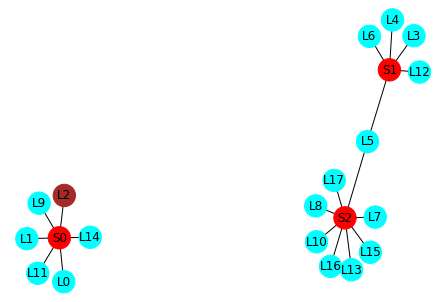

In [34]:
nviz.plot_soma_limb_concept_network(recovered_neuron)

In [35]:
nviz.visualize_neuron(recovered_neuron,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [29]:
current_mesh = su.decompress_pickle("current_mesh")
seperate_soma_meshes = su.decompress_pickle("seperate_soma_meshes")

In [30]:
nviz.plot_objects(current_mesh)